Name : Dhaval Gogri

SMU ID : 47444609

Course : Advanced Application Programming

Homework No : Quest 9 (Regression and Performace)

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [201]:
y_data,x_data = np.genfromtxt('/Users/dhavalgogri/Documents/AA Dhaval old computer/000 SMU study materials/Fall2018/AdvancedApplProgramming/Quest9/q9data.csv' , delimiter=',',unpack = True)

# Part 1 : Linear Regression using Computational Formula

In [202]:
#Below method calculates the covariance
def calculate_covariance(x_p,y_p,x_mean,y_mean, is_sample):
    covariance = 0.0
    sum = 0.0
    for (x_point,y_point) in zip(x_p,y_p):
        sum = sum + (x_point - x_mean)*(y_point - y_mean)
    if(is_sample):
        covariance = sum / (len(x_p) - 1)
    else:
        covariance = sum / len(x_p)
    return covariance
    

In [203]:
#parse the list and get the mean value of the list
def get_mean(list_data):
    mean = 0.0
    for data in list_data:
        mean = mean + data
    return mean/len(list_data)

In [204]:
#calculate the variance
def calculate_variance(list_data,list_mean, is_sample):
    variance = 0.0
    sum = 0.0
    for (data) in list_data:
        sum = sum + (data - list_mean)**2
    if(is_sample):
        variance = sum / (len(list_data) - 1)
    else:
        variance = sum / len(list_data)
    return variance
    

In [205]:
# error calculation
def calculate_error(b,m,x_p,y_p):
    sum = 0.0
    for i in range(len(x_p)):
        x = x_p[i]
        y = y_p[i]
        sum = sum + (y - (m*x + b))**2
    return sum/len(x_p)

In [206]:
# getting mean value of x and y. Getting population covariance and variance. Calculating Slope from 
# covariance and variance. Calculating y-intercept using slope and then calculating error


x_mean = get_mean(x_data)
y_mean = get_mean(y_data)
population_covariance = calculate_covariance(x_data,y_data,x_mean,y_mean, False)
population_variance = calculate_variance(x_data,x_mean,False)
slope_using_computational = population_covariance/population_variance
y_intercept_using_computational = y_mean - slope_using_computational * x_mean
error = calculate_error(y_intercept_using_computational, slope_using_computational, x_data, y_data)

print("Population Covariance = %f" %population_covariance)
print("Population Variance = %f" %population_variance)
print("Slope using Computational Method = %f" %slope_using_computational)
print("y-intercept using Computational Method = %f" %y_intercept_using_computational)
print("Error in Computational Method = %f" %error)

Population Covariance = 5.896497
Population Variance = 24.700113
Slope using Computational Method = 0.238723
y-intercept using Computational Method = -0.276180
Error in Computational Method = 0.065539


# Part 2 : Linear Regression using Gradient Descent Formula

In [207]:
def compute_error_for_line_given_points(b, m, points):
    sum = 0
    answer = 0
    for x_p,y_p in points:
        sum = sum + (y_p - (m*x_p + b))**2
    answer = sum / len(points)
    return answer

def partial_derivative_m(b, m, x_p, y_p, N):
    sum = 0.0
    answer = 0.0
    sum = sum - (x_p * (y_p - (m*x_p + b)))
    answer = (2 * sum) / N
    return answer

def partial_derivative_b(b, m, x_p, y_p, N):
    sum = 0.0
    answer = 0.0
    sum = sum - (y_p - (m*x_p + b))
    answer = (2 * sum) / N
    return answer

def step_gradient(b_current, m_current, x_p, y_p, learning_rate):
    #gradient descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(x_p))
    for i in range(0, len(x_p)):
        x = x_p[i]
        y = y_p[i]
        b_gradient += partial_derivative_b(b_current, m_current, x, y, N)
        m_gradient += partial_derivative_m(b_current, m_current, x, y, N)
        new_b = b_current - (b_gradient * learning_rate)
        new_m = m_current - (m_gradient * learning_rate)
    return [new_b, new_m]
    


In [208]:
def gradient_descent_runner(x_p, y_p, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    b_temp = []
    m_temp = []
    for i in range(0, num_iterations):
        b,m = step_gradient(b, m, x_p, y_p, learning_rate)
        b_temp.append(b)
        m_temp.append(m)
    b_data.append(b_temp)
    m_data.append(m_temp)
    plot_graph(b_temp, "No Of Iterations Performed", "Value of Slope")
    plot_graph(m_temp, "No Of Iterations Performed", "Value of y-intercept")
    return [b,m]
        
def plot_graph(data, x_label, y_label):
    plt.rcParams["figure.figsize"]=[10,5]
    plt.plot(range(len(data)),data)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

def get_y_data_for_scatter_plot(slope, y_intercept):
    y = []
    for x in x_data:
        y.append(slope*x + y_intercept)
    return y
        
def plot_scatter_graph(x_axis_data):
    i = 0
    for each_yint, each_slope in zip(y_intercept_data, slope_data):
        plt.rcParams["figure.figsize"] = [20,10]
        y_axis_data = get_y_data_for_scatter_plot(slope_using_computational, y_intercept_using_computational)
        labelForComputational = "Computational Method\nSlope = %f\ny-intercept = %f"%(slope_using_computational, y_intercept_using_computational)
        plt.scatter(x_axis_data, y_axis_data, c='green', s=15, label=labelForComputational)
        y_axis_data = get_y_data_for_scatter_plot(each_slope, each_yint)
        labelForGradientDescent = "Gradient Descent Method\nSlope = %f\ny-intercept = %f\nLearning Rate = %f"%(each_slope, each_yint, learning_rate[i])
        plt.scatter(x_axis_data, y_axis_data, c='red', s=15, label=labelForGradientDescent)
        plt.legend(prop={'size': 10})
        plt.ylabel("y - data points")
        plt.xlabel("x - data points")
        plt.show()
        i = i + 1

In [209]:
learning_rate = [0.001, 0.0025, 0.005, 0.0001]

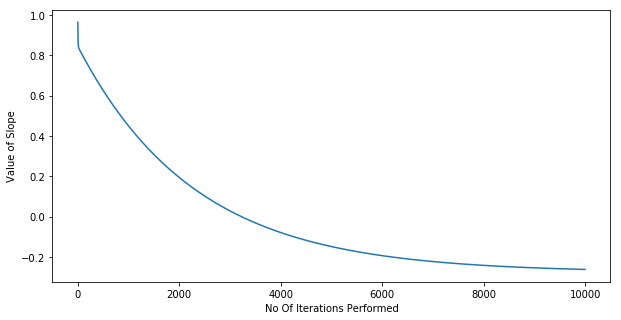

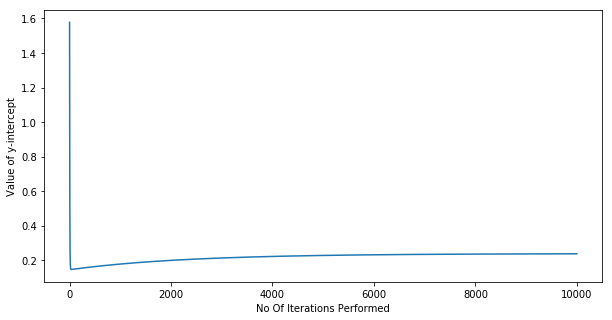

Learning Rate = 0.001000
Slope(m) = 0.237504
y-intercept(b) = -0.261545
Error = 0.065586











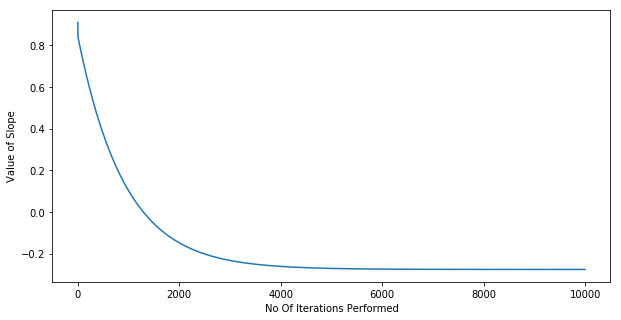

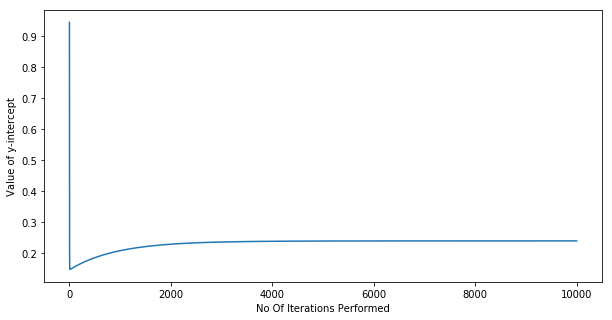

Learning Rate = 0.002500
Slope(m) = 0.238722
y-intercept(b) = -0.276159
Error = 0.065539











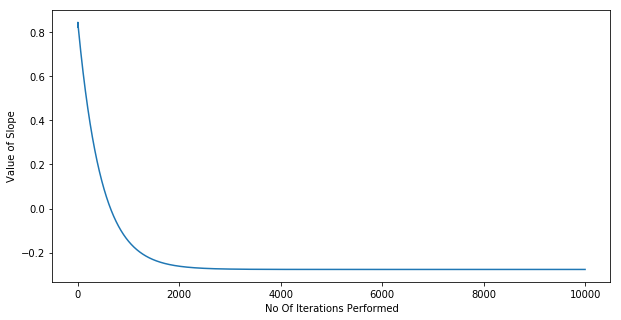

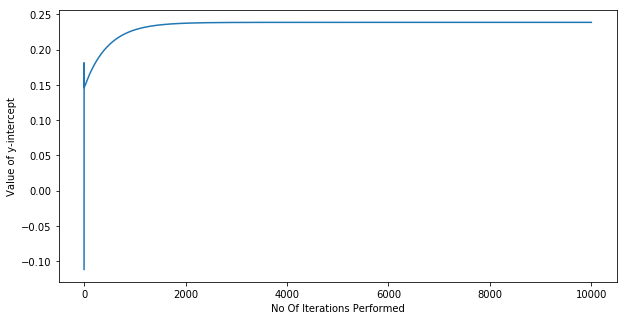

Learning Rate = 0.005000
Slope(m) = 0.238723
y-intercept(b) = -0.276180
Error = 0.065539











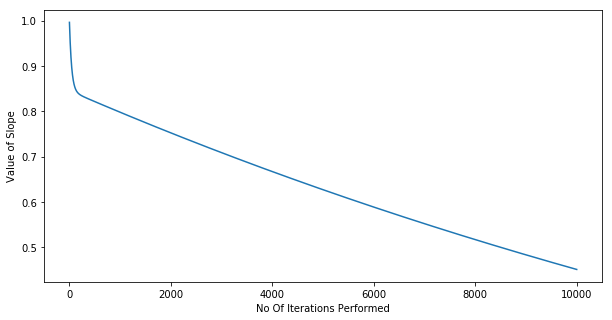

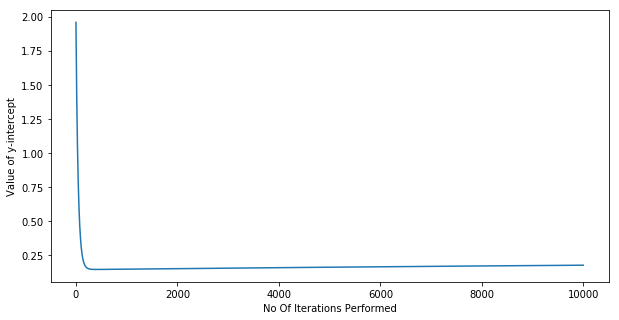

Learning Rate = 0.000100
Slope(m) = 0.178179
y-intercept(b) = 0.450703
Error = 0.180941











In [210]:
b_data = []
m_data = []
y_intercept_data = []
slope_data = []

for each_learning_rate in learning_rate:
    y_intercept, slope = gradient_descent_runner(x_data, y_data,1,2,each_learning_rate,10000)
    y_intercept_data.append(y_intercept)
    slope_data.append(slope)
    print("Learning Rate = %f" %each_learning_rate)
    print("Slope(m) = %f" %slope)
    print("y-intercept(b) = %f" %y_intercept)
    print("Error = %f" %calculate_error(y_intercept, slope, x_data, y_data))
    print("\n\n\n\n\n\n\n\n")
    


 - When we look at the all the above graph, if correct learning rates are given, the model learns very quickly. In the case of Learning rate of 0.005. The correct slope is calcu;ated very quickly not needing much iterations. The slope remains constant. It also exactly matches with the Computational Method values. 
 - When we see the numbers are pretty constant, we know that we have reached we need and break from the iterations. 

# Scatter Plot

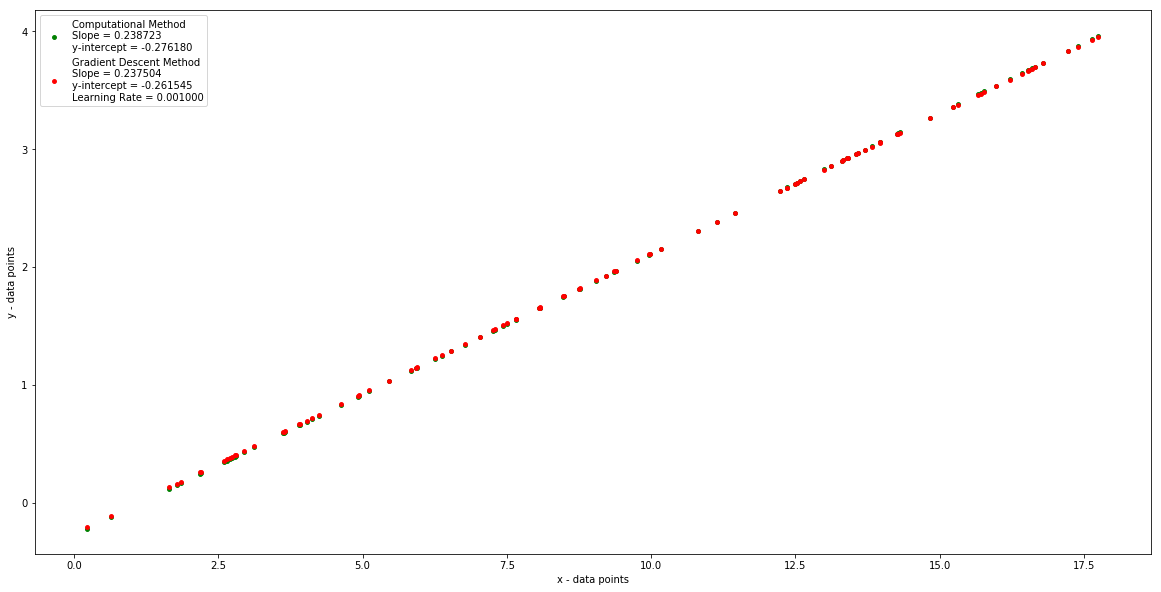

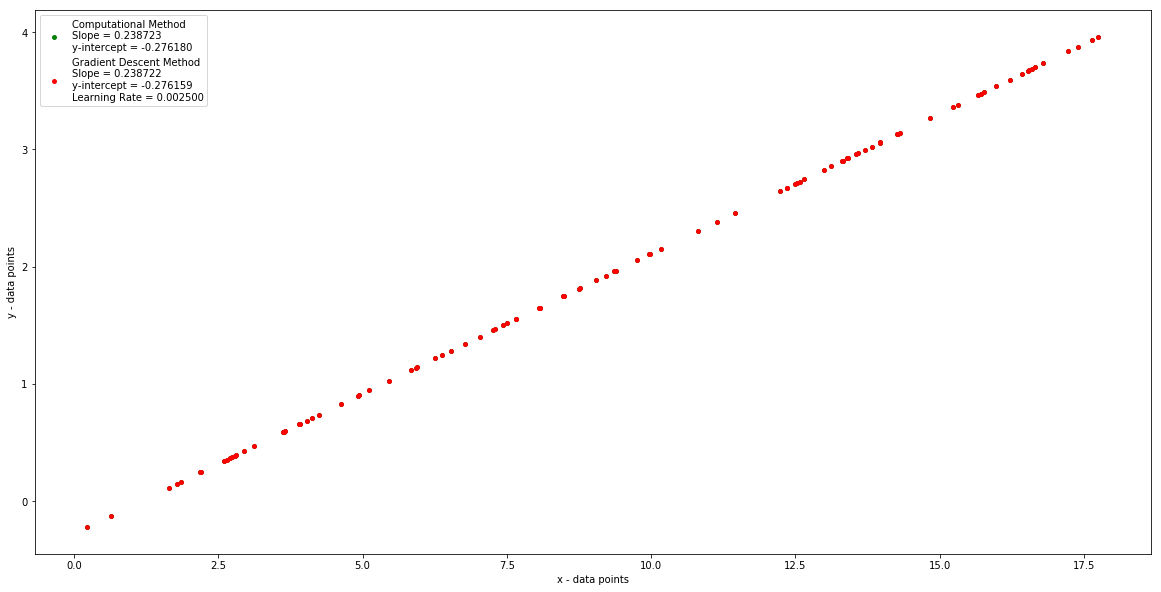

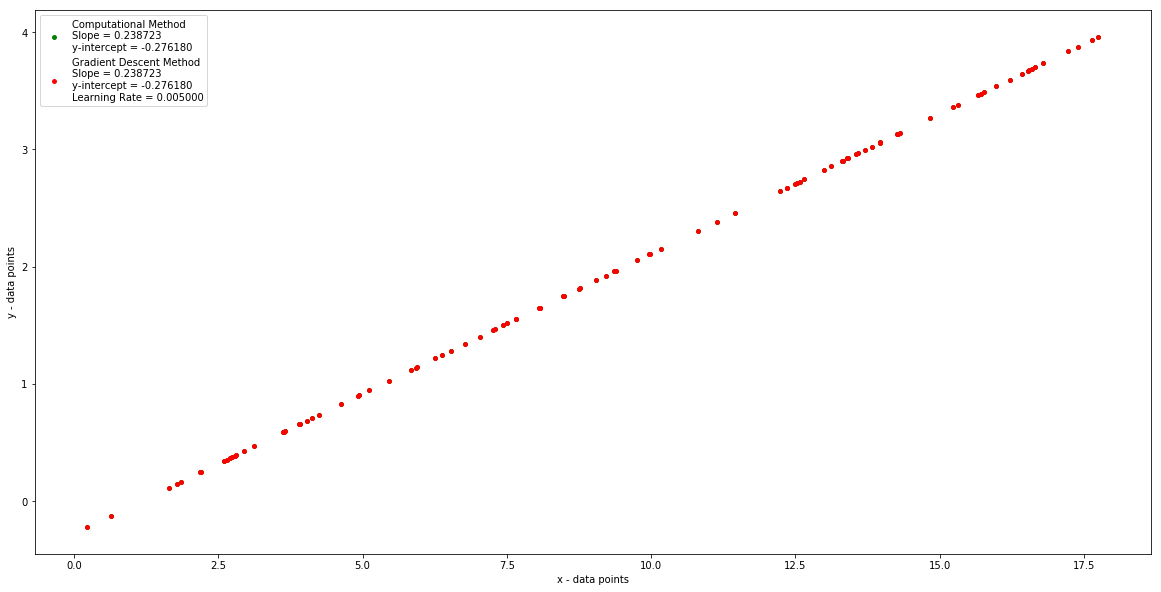

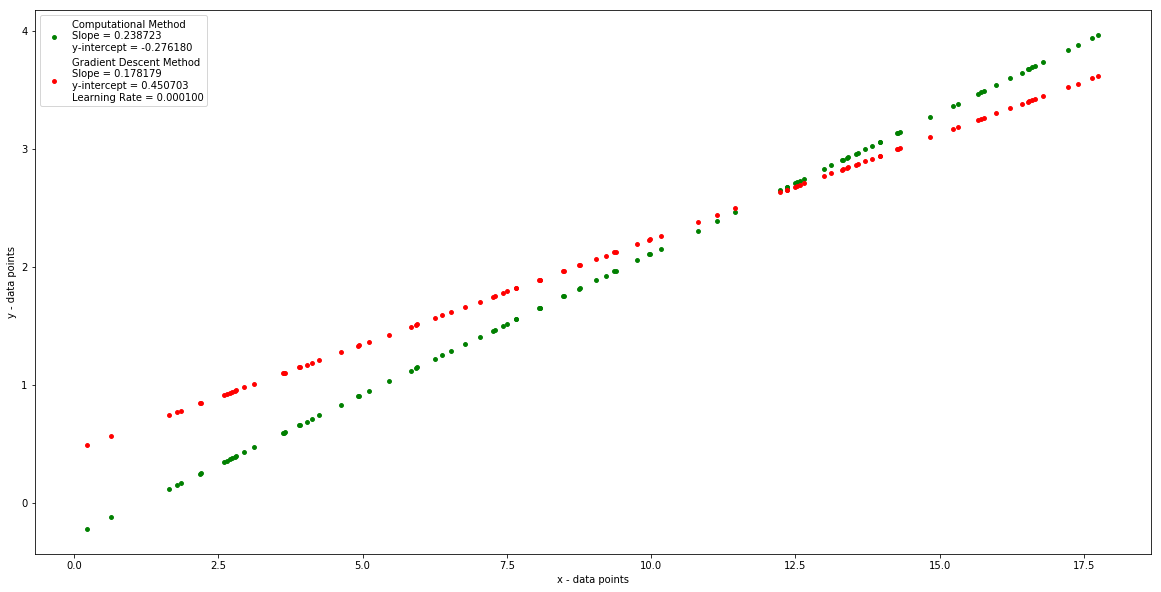

In [211]:
plot_scatter_graph(x_data)

Based on the slope and y-intercept we have got in the Computational Method and using the Gradient Descent Method, the learning rate 0.005, slope 2 and y-inercept 1 with gradient descent method and Computational Method have the exact same values. 
<br>
<br>
1. Computatinal Method
    - Slope(m) = 0.238723
    - y-intercept(b) = -0.276180
    - Error = 0.065539
<br>
<br>
2. Gradient Descent Method
    - Learning Rate = 0.005000
    - Slope(m) = 0.238723
    - y-intercept(b) = -0.276180
    - Error = 0.065539